## Data Description
The COVID-19 pandemic dataset in Indonesia, time series. This dataset is a compilation of various open data sources, including: covid19.go.id (pandemic data), kemendagri.go.id (demographic data), bps.go.id (demographic data), as well as some calculations of the relationship of the data.

This dataset contains a time series of COVID-19 pandemic events in Indonesia, at the country level to province level. If possible, in the future I will provide it to the city/regency level.

File data yang digunakan disini adalah'covid_19_indonesia_time_series_all.csv' yang bisa diakses di:
https://www.kaggle.com/datasets/hendratno/covid19-indonesia

## Objective
1. Mengetahui apakah terdapat peningkatan yang signifikan pada jumlah kematian harian dari bulan ke-3 ke bulan ke-4.
2. Mengetahui apakah terdapat perbedaan yang signifikan pada jumlah kematian harian dari bulan ke-3 ke bulan ke-4.
3. Mengetahui pakah terdapat perbedaan jumlah total kasus yang signifikan dari provinsi Jawa Timur dan Jawa Tengah.
4. Mengetahui pakah terdapat perbedaan total kasus aktif secara signifikan antara rata-rata tiap provinsi di pulau Kalimantan.

## Working Area

Import library yang diperlukan

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Load data dari csv menjadi suatu DataFrame

In [21]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


### One Sample One Tailed
Diketahui rata-rata jumlah kematian akibat COVID-19 pada bulan ke-3 2020 adalah sebesar 80 per hari di Indonesia, dan pada bulan ke-4 rata-ratanya mencapai 88.65. Apakah terdapat peningkatan yang signifikan pada jumlah kematian harian?

In [3]:
feature = data.columns.tolist()

In [58]:
c = []
for i in range(len(data)):
    if '4' in data['Date'][i][0]:
        c.append(True)
    else: c.append(False)
filter = np.array(c)
data_bulan4 = data[filter & (data['Location'] == 'Indonesia')]
print(f'Rata-rata jumlah kematian per hari bulan ke-4 adalah {data_bulan4["New Deaths"].mean()}')

Rata-rata jumlah kematian per hari bulan ke-4 adalah 88.65 


Our hypothesis on this case:

**$$H0: μ \le 80$$**

**$$H1: μ > 80$$**

Untuk pengujian hipotesis disini dilakukan uji single sample one sided dengan significance level 0.05.

In [59]:
t_stat,p_val = stats.ttest_1samp(data_bulan4["New Deaths"], 80)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.20871545612320958
t-statistics: 0.8166197334539826


c:\Users\ikhbar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


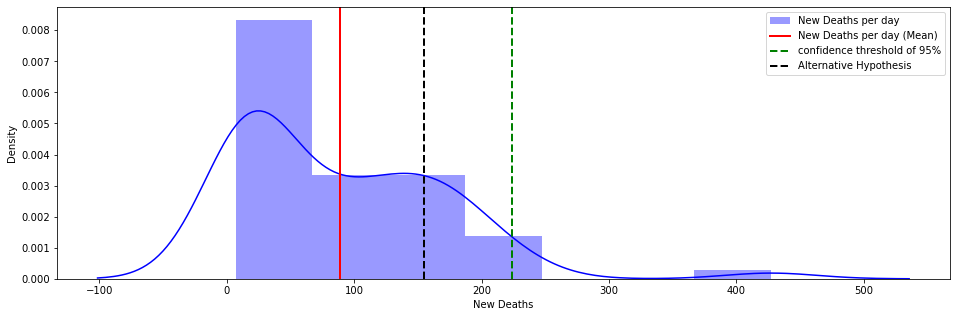

In [80]:
data_bulan4_pop = np.random.normal(data_bulan4["New Deaths"].mean(), data_bulan4["New Deaths"].std(), 10000)

ci = stats.norm.interval(0.9, data_bulan4["New Deaths"].mean(), data_bulan4["New Deaths"].std())

plt.figure(figsize=(16,5))
sns.distplot(data_bulan4['New Deaths'], label='New Deaths per day', color='blue')
plt.axvline(data_bulan4["New Deaths"].mean(), color='red', linewidth=2, label='New Deaths per day (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(data_bulan4["New Deaths"].mean() + t_stat*data_bulan4_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

**Karena  p-value lebih besar dari `0.05`, maka kita terima the null hypothesis** dan dapat dinyatakan bahwa **tidak** terdapat peningkatan jumlah kematian per hari secara signifikan.

*Note: Variable `t-statistics` refers to how far the alternative hypothesis from null hypothesis away.*

Untuk lebih jelasnya kita dapat menggambarkan histogram dari data sampel di bulan ke 3 dan 4.

c:\Users\ikhbar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ikhbar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='New Deaths', ylabel='Density'>

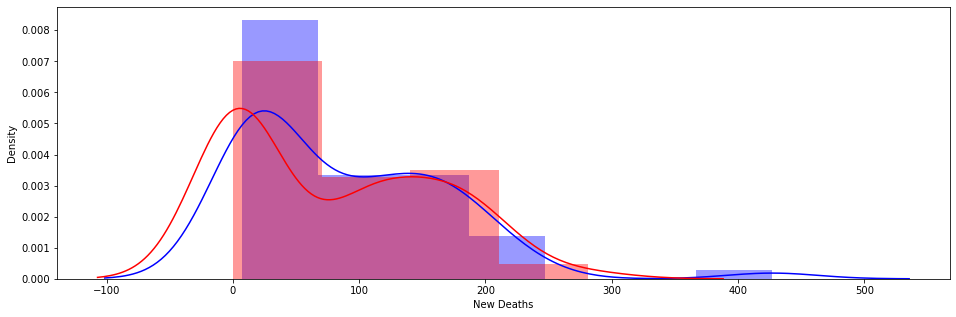

In [82]:
plt.figure(figsize=(16,5))
sns.distplot(data_bulan4['New Deaths'], label='New Deaths per day bulan 4', color='blue')
sns.distplot(data_bulan3['New Deaths'], label='New Deaths per day bulan 3', color='red')

### One Sample Two Tailed
Diketahui rata-rata jumlah kematian akibat COVID-19 pada bulan ke-3 2020 adalah sebesar 80 per hari di Indonesia, dan pada bulan ke-4 rata-ratanya mencapai 88.65. Apakah terdapat perbedaan yang signifikan pada jumlah kematian harian?

Our hypothesis on this case:

**$$H0: μ = 80$$**

**$$H1: μ \ne 80$$**

Untuk pengujian hipotesis disini dilakukan uji single sample one sided dengan significance level 0.05.

In [83]:
t_stat,p_val = stats.ttest_1samp(data_bulan4["New Deaths"], 80)
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 0.41743091224641915
t-statistics: 0.8166197334539826


c:\Users\ikhbar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


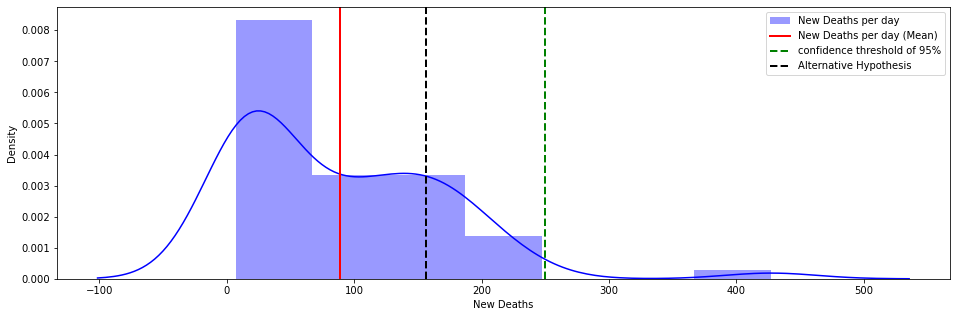

In [84]:
data_bulan4_pop = np.random.normal(data_bulan4["New Deaths"].mean(), data_bulan4["New Deaths"].std(), 10000)

ci = stats.norm.interval(0.95, data_bulan4["New Deaths"].mean(), data_bulan4["New Deaths"].std())

plt.figure(figsize=(16,5))
sns.distplot(data_bulan4['New Deaths'], label='New Deaths per day', color='blue')
plt.axvline(data_bulan4["New Deaths"].mean(), color='red', linewidth=2, label='New Deaths per day (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(data_bulan4["New Deaths"].mean() + t_stat*data_bulan4_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

**Karena  p-value lebih besar dari `0.05`, maka kita terima the null hypothesis** dan dapat dinyatakan bahwa **tidak** terdapat perbedaan jumlah kematian per hari secara signifikan.

*Note: Variable `t-statistics` refers to how far the alternative hypothesis from null hypothesis away.*

### Two Samples Independent Two Tailed Hypothesis Testing

Provinsi Jawa Timur dan Jawa Tengah merupakan dua provinsi yang berdekatan dan kedunya termasuk dalam jumlah total kasus COVID-19 yang besar. Dari data sampel dalam 5 bulan ini, kita akan coba cek apakah terdapat perbedaan yang signifikan dari kedua provinsi tersebut berdasarkan rata-rata jumlah total kasusnya.

Pengujian hipotesis disini menggunakan uji **two samples independent two tailed test.**

Our hypothesis on this case:

**$$H0: μ_1-μ_2 = 0$$**

**$$H1: μ_1-μ_2 \ne 0$$**

Pertama kita coba kumpulkan data total kasus COVID-19 pada provinsi Jawa Tengah dan Jawa Timur.

In [146]:
data_jatengx = data[data['Location'] == 'Jawa Tengah'][['Date','Total Cases']].set_index('Date')
data_jatimx = data[data['Location'] == 'Jawa Timur'][['Date','Total Cases']].set_index('Date')
data_jatengx.join(data_jatimx, lsuffix=' Jawa Tengah', rsuffix=' Jawa Timur')

,Total Cases Jawa Tengah,Total Cases Jawa Timur
Date,,
3/8/2020,1,NaN
3/9/2020,1,NaN
3/10/2020,1,NaN
3/11/2020,3,NaN
3/12/2020,3,NaN
...,...,...
11/28/2021,486330,399368.0
11/29/2021,486350,399378.0
11/30/2021,486385,399413.0


In [147]:
data_jateng = data[data['Location'] == 'Jawa Tengah']['Total Cases']
data_jatim = data[data['Location'] == 'Jawa Timur']['Total Cases']

print(f'Rata-rata total kasus di Jawa Tengah adalah {round(data_jateng.mean(),2)}')
print(f'Rata-rata total kasus di Jawa Timur adalah {round(data_jatim.mean(),2)}')

Rata-rata total kasus di Jawa Tengah adalah 164727.38
Rata-rata total kasus di Jawa Timur adalah 140511.67


Terlihat bahwa kedua rata-rata provinsi tersebut tidak berbeda jauh.

In [148]:
t_stat, p_val = stats.ttest_ind(data_jateng,data_jatim)
print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.006176374827481747
t-statistics: 2.7428995721821288


Dengan asumsi kedua populasi berdistribusi normal, kita bisa ilustrasikan sebagai berikut:

c:\Users\ikhbar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ikhbar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


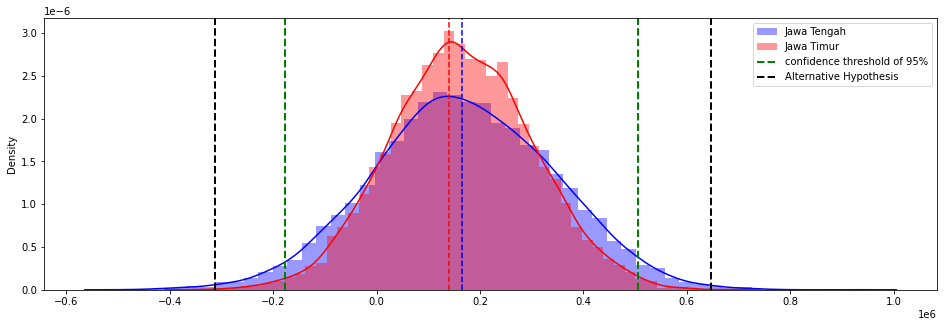

In [157]:
jateng_pop=np.random.normal(data_jateng.mean(),data_jateng.std(),10000)
jatim_pop=np.random.normal(data_jateng.mean(),data_jatim.std(),10000)

ci = stats.norm.interval(0.95, data_jateng.mean(),data_jateng.std()) #Karena asums awal kedua variabel x_1=x_2 maka confidence interval kita gunakan salah satu variabel acak saja

plt.figure(figsize=(16,5))
sns.distplot(jateng_pop, label = 'Jawa Tengah', color = 'blue')
sns.distplot(jatim_pop, label = 'Jawa Timur', color = 'red')

plt.axvline(data_jateng.mean(), linestyle='dashed', color = 'blue')
plt.axvline(data_jatim.mean(), linestyle='dashed', color = 'red')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(jateng_pop.mean()+t_stat*jateng_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(jateng_pop.mean()-t_stat*jateng_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

**Karena  p-value 0.00617 lebih kecil dari `0.05`, maka kita tolak the null hypothesis** dan dapat dinyatakan bahwa **terdapat** perbedaan jumlah total kasus ecara signifikan.

### ANOVA

Kali ini kita akan meninjau total kasus aktif dalam rentang 5 bulan di pulau Kalimantan, apakah terdapat perbedaan secara signifikan antara rata-rata tiap provinsi di pulau Kalimantan (Kalimantan Barat, Kalimantan Timur, Kalimantan Tengah, Kalimantan Utara, Kalimantan Selatan)?

Hipotesis kita disini dapat dituliskan sebagai:

$H_0:\mu_1=\mu_2=\mu_3=\mu_4=\mu_5$

$H_1:$ Tidak semua rata-rata sama

Pertama-tama kita akan kumpulkan data total kasus aktif pada tiap provinsi di pulau Kalimantan.

In [164]:
data_kalbar = data[data['Location'] == 'Kalimantan Barat']['Total Active Cases']
data_kaltim = data[data['Location'] == 'Kalimantan Timur']['Total Active Cases']
data_kalteng = data[data['Location'] == 'Kalimantan Tengah']['Total Active Cases']
data_kalut = data[data['Location'] == 'Kalimantan Utara']['Total Active Cases']
data_kalsel = data[data['Location'] == 'Kalimantan Selatan']['Total Active Cases']

print(f'Rata-rata total kasus di Kalimantan Barat adalah {round(data_kalbar.mean(),2)}')
print(f'Rata-rata total kasus di Kalimantan Timur adalah {round(data_kaltim.mean(),2)}')
print(f'Rata-rata total kasus di Kalimantan Tengah adalah {round(data_kalteng.mean(),2)}')
print(f'Rata-rata total kasus di Kalimantan Utara adalah {round(data_kalut.mean(),2)}')
print(f'Rata-rata total kasus di Kalimantan Selatan adalah {round(data_kalsel.mean(),2)}')

Rata-rata total kasus di Kalimantan Barat adalah 651.41
Rata-rata total kasus di Kalimantan Timur adalah 3249.57
Rata-rata total kasus di Kalimantan Tengah adalah 1720.63
Rata-rata total kasus di Kalimantan Utara adalah 1245.03
Rata-rata total kasus di Kalimantan Selatan adalah 1822.69


In [165]:
f_stat,p_value = stats.f_oneway(data_kalbar, data_kaltim,data_kalteng,data_kalut,data_kalsel)
print('P-value:',p_value)

P-value: 2.259350438361357e-69


**Karena nilai p-value is below 0.05, maka kita tolak Null Hypothesis.** Dapat dinyatakan bahwa terdapat perbedaan yang cukup signifikan antara tiap provinsi di pulau Kalimantan.